In [1]:
from __future__ import division
import sys
home_dir=!echo "$HOME"
sys.path.insert(2,home_dir[0]+'/iPyNb/NERSC_Import') 
from pandas_import import *
from matplotlib.colors import ListedColormap

%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 8.0) # set size of figures"
plt.rcParams.update({'font.size': 20})

from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
#3 CH3T Dec2013
data_ch3t=sio.loadmat('/project/projectdirs/lux/data/platinum/Platinum_CH3T_Dec.mat')
df_ch3t=df_from_mat(data_ch3t)
data_dd=sio.loadmat('/project/projectdirs/lux/data/platinum/Platinum_DD_Run03.mat')
df_dd=df_from_mat(data_dd)

In [3]:
#from __future__ import division
#import sys
#sys.path.insert(1,'/global/project/projectdirs/lux/Tools/anaconda/lib/python2.7/site-packages/scikit_learn-0.17-py2.7.egg-info')
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [7]:
df_ch3t.describe()

,sd_Rsup,corrected_y,corrected_x,s1xyz_correction,s1area_raw,s1eFitTauFall,s2_rec_cor,s1area,elife_correction,luxstamp,...,s2area_raw,spikyS2,taxy_xy_sigma,y,x,s1pf,sdPhi,spikyS2_raw,taxy_y_cor,spikyS1
count,169614.000000,169614.000000,169614.000000,169614.000000,169614.000000,169614.000000,169614.000000,169614.000000,169614.000000,1.696140e+05,...,169614.000000,169614.000000,169614.000000,169614.000000,169614.000000,169614.000000,169614.000000,169614.000000,169614.000000,169614.000000
mean,0.395205,0.288653,-0.124025,0.989065,27.899144,3.586216,2459.330479,30.117959,1.167924,9.352249e+15,...,1941.005718,1739.253162,2.584769,0.356608,-0.151924,0.753315,0.373467,1483.548375,0.307150,30.313783
std,0.105526,10.010347,10.043800,0.081376,19.758720,1.275304,1103.292099,21.139694,0.081939,4.414010e+12,...,881.771888,642.083063,216.190831,9.392509,9.399476,0.144193,0.115779,538.504872,9.997617,21.211308
min,0.167662,-19.977495,-19.992889,0.820761,0.334193,0.000000,223.953369,0.349196,1.031677,9.343950e+15,...,178.862000,193.590393,0.004691,-20.364645,-20.712881,-0.027430,0.000121,161.000000,-21.305780,0.908232
25%,0.316502,-7.834001,-8.261502,0.920234,11.904268,2.625395,1612.297913,12.908113,1.096199,9.347097e+15,...,1268.518860,1250.201080,0.037398,-7.245626,-7.685993,0.739732,0.300865,1072.000000,-7.736274,12.954449
50%,0.376378,0.323222,-0.273271,0.991165,24.091478,3.519417,2281.168701,26.111097,1.165051,9.353872e+15,...,1794.888306,1669.454163,0.077201,0.283977,-0.250742,0.781273,0.354518,1430.000000,0.256314,26.231521
75%,0.454550,8.465113,8.065962,1.059003,40.229161,4.388948,3125.153687,43.565553,1.238150,9.355288e+15,...,2465.986938,2148.326965,0.207063,7.977389,7.444163,0.814120,0.424529,1836.000000,8.437357,43.828260
max,1.529335,19.990210,19.988480,1.171526,145.498749,17.170876,10926.602539,145.625656,1.317576,9.358507e+15,...,10112.311523,6722.243652,78623.226562,20.289013,20.627672,1.645187,6.464032,5273.000000,20.746508,141.315201


In [7]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes"]

In [15]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB()]

<h1> Make random tranining data</h1>

In [4]:
h=1
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

In [10]:
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

In [74]:
#figure = plt.figure(figsize=(27*50, 9*50))
#i = 1
plt.figure()

In [63]:
hstack((zeros_like(df_ch3t.s1area),ones_like(df_dd.s1area)))

array([ 0.,  0.,  0., ...,  1.,  1.,  1.])

<h1> Load in all DD and Tritium data, cut off at 20 phd in S1 </h1>

In [6]:
n=5000

#df_ch3t.s1area[df_ch3t.loc[:,'s1area']<20]

cut=df_ch3t.loc[:,'s1area']<20
cutd=df_dd.loc[:,'s1area']<20

x1=hstack((df_ch3t.s1area[cut][1:n],df_dd.s1area[cutd][1:n]))
x2=hstack((log10(df_ch3t.s2area[cut][1:n]),log10(df_dd.s2area[cutd][1:n])))

X_all=vstack((x1,x2-log10(x1))).T
y_all=hstack((zeros_like(df_ch3t.s1area[1:n]),ones_like(df_dd.s1area[1:n])))

<h1>Down sample, only getting N events per bin of S1 in each catagory </h1>

In [9]:
df_ch3t['s1_int']=int32(df_ch3t['s1area'])
df_dd['s1_int']=int32(df_dd['s1area'])
grouped=df_ch3t.groupby(['s1_int'])

xx=np.array([])
yy=np.array([])
T=np.array([])

n=50 #be carefull, that the shapes end up being consistent.

for ii in arange(1,21,1):
    xx=np.append(xx,grouped.s1area.get_group(ii).values[0:n])
    yy=np.append(yy,grouped.s2area.get_group(ii).values[0:n])
    T=np.append(T,zeros(n))

grouped=df_dd.groupby(['s1_int'])
for ii in range(1,21,1):
    xx=np.append(xx,grouped.s1area.get_group(ii).values[0:n])
    yy=np.append(yy,grouped.s2area.get_group(ii).values[0:n])
    T=np.append(T,ones(n))

#xx=np.array(xx)
#yy=np.array(yy)
#y=np.array(T)

X=vstack((xx,log10(yy/xx))).T
y=T

In [10]:
shape(X), shape(T)

((2000, 2), (2000,))

In [11]:
h = 0.1  # step size in the mesh

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

(0.61087865570433464, 3.610878655704334)

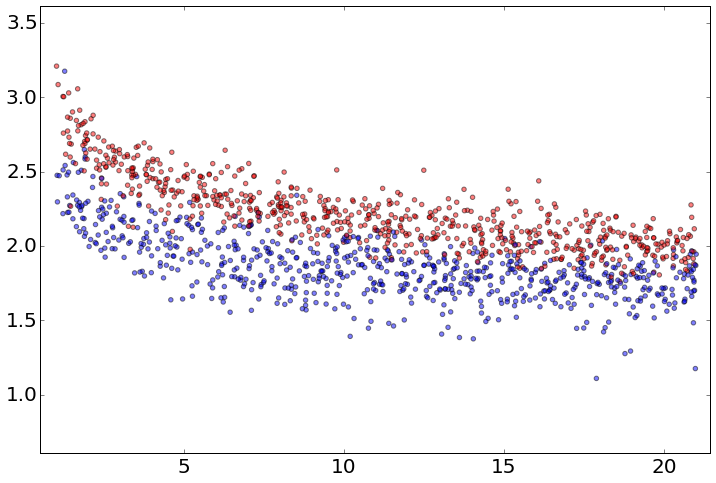

In [12]:
#label_size = 20
#mpl.rcParams['xtick.labelsize'] = label_size 
#mpl.rcParams['ytick.labelsize'] = label_size

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,alpha=0.5)
# and testing points
#scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
xlim(xx.min(), xx.max())
ylim(yy.min(), yy.max())
#xticks(())
#yticks(())
#yscale('log')

(0.88698630136986301, 0.88636363636363635)
(0.85616438356164382, 0.9058441558441559)
(0.91438356164383561, 0.90909090909090906)
(0.90410958904109584, 0.87987012987012991)
(0.88698630136986301, 0.92207792207792205)
(0.91095890410958902, 0.90259740259740262)
(0.82191780821917804, 0.73376623376623373)


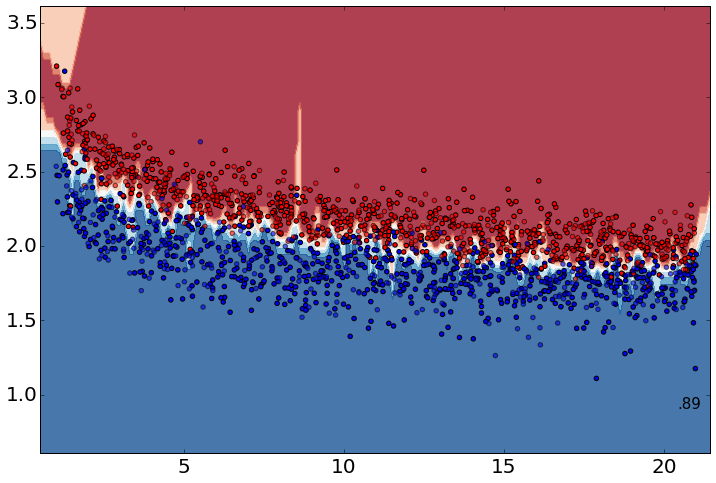

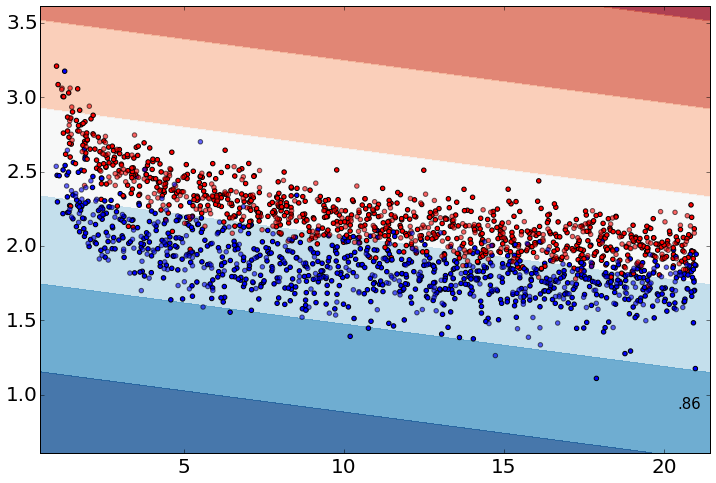

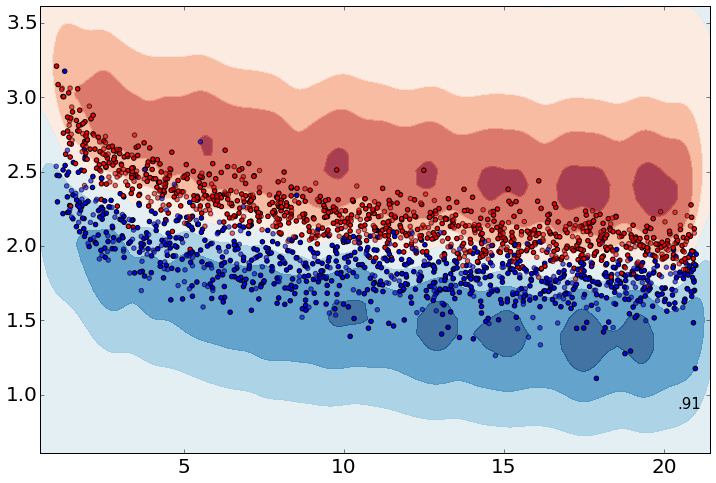

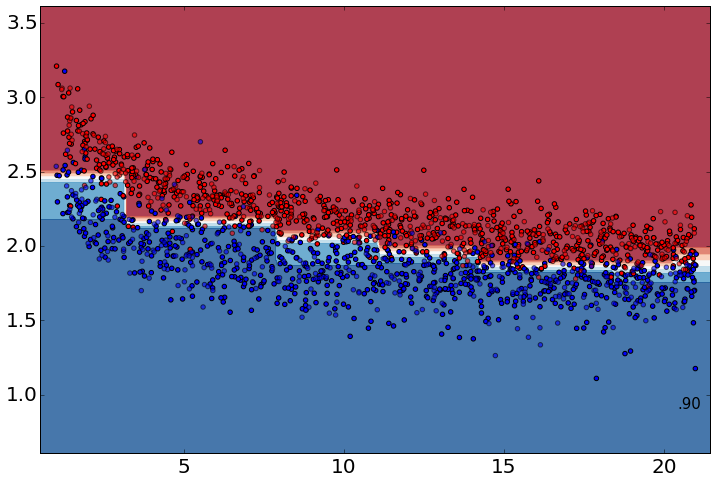

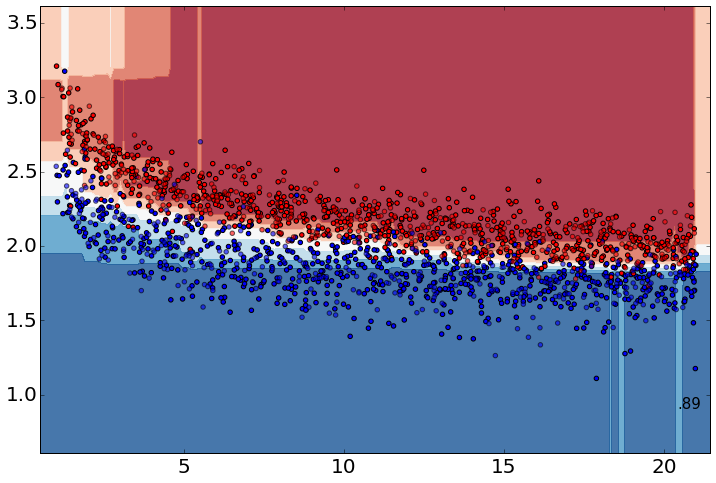

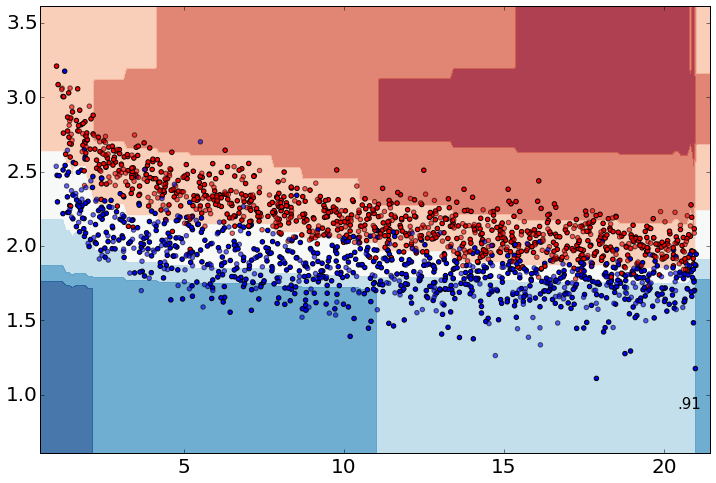

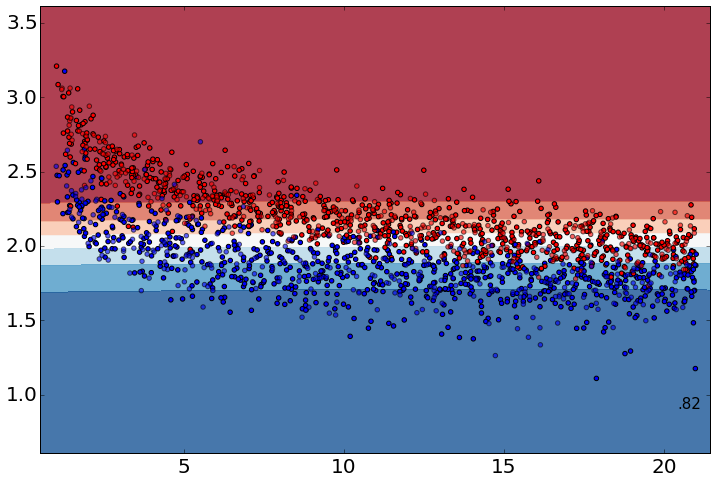

In [16]:
#figure = plt.figure(figsize=(27*5, 9*5))
i=0
# iterate over classifiers
for clf in classifiers:
    plt.figure()
    #ax= plt.subplot(len(datasets), len(classifiers), i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test[y_test==1], y_test[y_test==1])
    score_er = clf.score(X_test[y_test==0], y_test[y_test==0])
    
    print(score, score_er)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax=plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                alpha=0.6)

    xlim(xx.min(), xx.max())
    ylim(yy.min(), yy.max())
    #ax.set_xticks(())
    #ax.set_yticks(())
    #ax.set_title(name)
    text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1

#figure.subplots_adjust(left=.02, right=.98)
#plt.show()

In [23]:
classifier = classifiers[2]
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
y_score_all = classifier.fit(X_train, y_train).decision_function(X_all)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr[0], tpr[0], _ = roc_curve(y_test, y_score)
roc_auc[0] = auc(fpr[0], tpr[0])

fpr[1], tpr[1], _ = roc_curve(y_all, y_score_all)
roc_auc[1] = auc(fpr[1], tpr[1])

#fpr[1], tpr[1], _ = roc_curve(y_test[y_test==1], y_score[y_test==1])
#roc_auc[1] = auc(fpr[1], tpr[1])

# Compute micro-average ROC curve and ROC area
#fpr, tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

(0.00020004000800160032, 0.1)

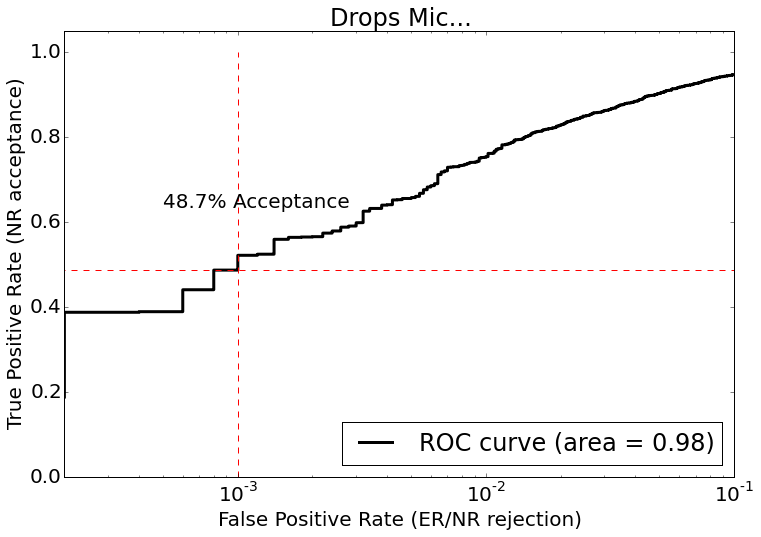

In [53]:
# Plot of a ROC curve for a specific class
#plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], '-k', linewidth=3, label='ROC curve (area = %0.2f)' % roc_auc[1]) #all
#plt.plot([0, 1], [0, 1], 'k--')
xscale('log')
xlim([0.0001, 0.5])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (ER/NR rejection)')
plt.ylabel('True Positive Rate (NR acceptance)')
plt.title('Drops Mic... ')
plt.legend(loc="lower right")

accept_val=tpr[1][np.abs(fpr[1]-1e-3).argmin()] #acceptance at 1/1000 rejection
plt.plot([1e-3,1e-3],[0,1],'--r')
plt.plot([0,1],[accept_val,accept_val],'--r')
plt.text(5e-4,accept_val*1.3,'{:1.1f}% Acceptance'.format(accept_val*100))

#plt.show()
xlim([0,.1])


In [40]:
tpr[1][np.abs(fpr[1]-1e-3).argmin()]


0.48689737947589518

In [39]:
np.abs(fpr[1]-1e-3).argmin()

2438

In [38]:
np.abs(fpr[1]-1e-3).argmin

<function argmin>